#### Load necessay libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load the dataset

In [2]:
data = pd.read_csv('play.csv')

data.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


#### Find class prior probabilities

In [9]:
size = len(data)

yes = data.loc[data['play'] == 'Yes'].count()[0]
no = data.loc[data['play'] == 'No'].count()[0]

prob_yes = yes / size
prob_no = no / size

print("P(Yes) =", prob_yes)
print("P(No)  =", prob_no)

P(Yes) = 0.6428571428571429
P(No)  = 0.35714285714285715


#### Find Entropy of play

In [10]:
S = (-prob_yes * np.log2(prob_yes)) - (prob_no * np.log2(prob_no)) 

print(S)

0.9402859586706311


#### Define function for Entropy for different labels

In [11]:
def calculate_entropy (prob_yes, prob_no):
    
    # if either or both probabilities are zero
    if (prob_yes == 0 and prob_no == 0):
        return 0
    elif (prob_yes == 0):
        return -prob_no * np.log2(prob_no)
    elif (prob_no == 0):
        return prob_yes * np.log2(prob_yes)
    
    entropy = (-prob_yes * np.log2(prob_yes)) - (prob_no * np.log2(prob_no))
    return entropy

#### Define function for entropies of each feature

In [12]:
def get_feature_entropy(feature):
    
    size = feature.size
    
    feature_values = feature.unique()
    feature_name = feature.name
    
    entropy_dict = {}
    
    for f in feature_values:
        yes_count = data.loc[(data[feature_name] == f) & (data.play == 'Yes')].count()[0]
        no_count = data.loc[(data[feature_name] == f) & (data.play == 'No')].count()[0]
        
        total_count = yes_count + no_count
        p_yes, p_no = yes_count / total_count, no_count / total_count
        
        entropy = calculate_entropy(p_yes, p_no)
        
        entropy_dict[f] = [entropy, total_count / size]
        
    return entropy_dict

#### Get entropies of different features

In [13]:
outlook_entr = get_feature_entropy(data.outlook)
temp_entr = get_feature_entropy(data.temp)
humidity_entr = get_feature_entropy(data.humidity)
wind_entr = get_feature_entropy(data.wind)

#### Define function to calculate gain

In [14]:
# find all the gains
def calculate_gain(entropies):
    
    total_entr = 0
    
    for entropy in entropies:
        prob, entr = entropies.get(entropy)
        
        total_entr += prob * entr
        
    gain = S - total_entr
    
    return gain

In [17]:
print('Outlook gain     =', calculate_gain(outlook_entr))
print('Temperature gain =', calculate_gain(temp_entr))
print('Humidity gain    =', calculate_gain(humidity_entr))
print('Wind gain        =', calculate_gain(wind_entr))

Outlook gain     = 0.24674981977443933
Temperature gain = 0.02922256565895487
Humidity gain    = 0.15183550136234159
Wind gain        = 0.04812703040826949


### From above results gain of outlook is the maximum. Therefore, Outlook should be the root node

## Use scikit learn library

In [19]:
from sklearn import tree

#### Build the model for Decision Tree Classifier

In [20]:
classifier = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)

#### Separate the features and target

In [21]:
x, y = data.drop(['day', 'play'], axis = 1), data.play

x

,outlook,temp,humidity,wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


### Perform feature encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [23]:
outlook_encoded = encoder.fit_transform(x.outlook)
temp_encoded = encoder.fit_transform(x.temp)
humidity_encoded = encoder.fit_transform(x.humidity)
wind_encoded = encoder.fit_transform(x.wind)

y_encoded = encoder.fit_transform(y)

In [24]:
x_encoded = []

for i in range(len(x)):
    x_encoded.append([outlook_encoded[i], temp_encoded[i], humidity_encoded[i], wind_encoded[i]])

In [25]:
x_encoded

[[2, 1, 0, 1],
 [2, 1, 0, 0],
 [0, 1, 0, 1],
 [1, 2, 0, 1],
 [1, 0, 1, 1],
 [1, 0, 1, 0],
 [0, 0, 1, 0],
 [2, 2, 0, 1],
 [2, 0, 1, 1],
 [1, 2, 1, 1],
 [2, 2, 1, 0],
 [0, 2, 0, 0],
 [0, 1, 1, 1],
 [1, 2, 0, 0]]

#### Train the model

In [26]:
classifier.fit(x_encoded, y_encoded)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

#### Get the prediction

In [27]:
prediction = classifier.predict([[1, 0, 0, 1]])

In [35]:
if (prediction[0] == 0):
    print("No, play will not be there")
else:
    print("Yes, play will be there")

No, play will not be there


### Plot the Decision Tree

[Text(0.4, 0.8333333333333334, 'outlook <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = No'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = No'),
 Text(0.6, 0.5, 'humidity <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = Yes'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = Yes'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = No')]

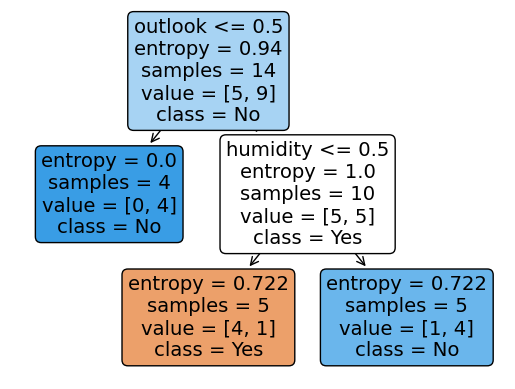

In [33]:
features = list(x.columns)
classes = ['Yes', 'No']

tree.plot_tree(classifier, feature_names = features, class_names = classes, max_depth = 2,
               filled = True, rounded = True)

### Therefore, we can see that Outlook is the Root node for the Decision Tree as we got while manually training the model.